## Case1

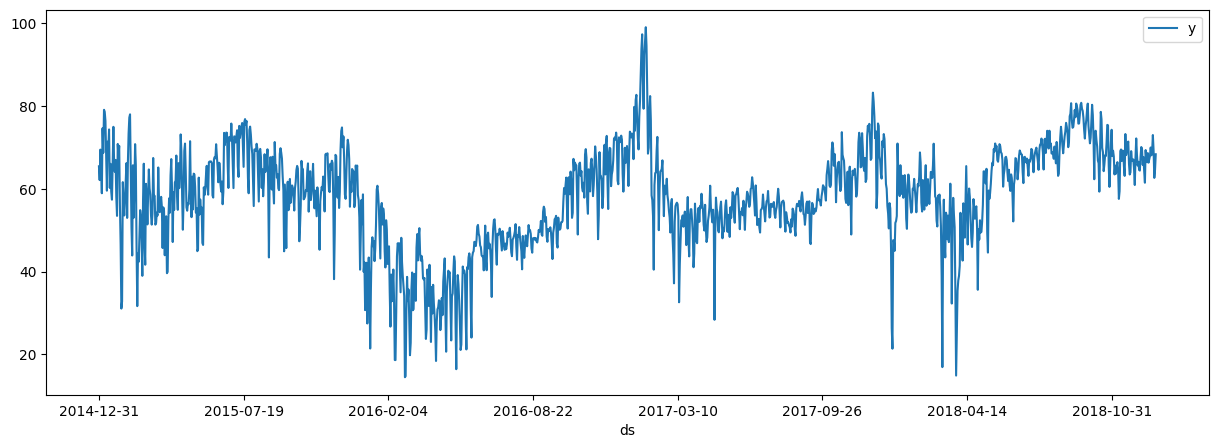

In [1]:
import pandas as pd

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
# Plot the dataset, showing price (y column) over time (ds column)
plt = df.plot(x="ds", y="y", figsize=(15, 5))

In [12]:
df

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91
...,...,...
1457,2018-12-27,72.96
1458,2018-12-28,69.23
1459,2018-12-29,62.62
1460,2018-12-30,64.57


In [7]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("plotly")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df)

WARNING - (py.warnings._showwarnmsg) - /Users/lost/miniconda3/envs/quant_env/lib/python3.8/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.




Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [8]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

Predicting: 46it [00:00, ?it/s]

In [9]:
m.plot_parameters(components=["trend", "seasonality"])

## Case2